<a href="https://colab.research.google.com/github/Beard31/Deep-Dive-Data-Science-Projects/blob/main/SQL_Chinook_Presentation_Beard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SQL Queries Chinook Presentation

For the presentation, pick a few questions from either Part 1 or Part 2 that you found challenging and explain how you answered the question with SQL.  If you did any of the extra credit, present on that.  The presentation should be no longer than 5 minutes and should highlight anything new that you learned.

## Data Collection/Sources

In [ ]:
# Install the sqlite package for Ubuntu
# Download the Chinook sqlite database
import sqlite3 as db
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
%%capture
%%bash
apt-get update
apt-get install -y sqlite3

In [ ]:
%%bash
[ -f chinook.zip ] ||
  curl -s -O https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip
unzip -l chinook.zip

In [ ]:
!rm -f chinook.db

In [ ]:
!unzip -u chinook.zip

In [ ]:
!ls -la

1. Which employee sold the most and what year was there best? Jane  Peacock tatal sales 833.04; her best year was 2010 with 221.92 sales.

In [31]:
# First we select what we want to query, and sum the total invoces
# Then connect E table to C table
# Join invocies on C table where CustomerID matches
# Group by ensures we get the total sales for each employee
# Order by Desc , highest to lowest
# limit one to ensure only highest gest printed out
%%script sqlite3 --column --header chinook.db
SELECT e.FirstName, e.LastName, SUM(i.Total) as TotalSales
FROM Employees e
JOIN Customers c ON e.EmployeeId = c.SupportRepId
JOIN Invoices i ON c.CustomerId = i.CustomerId
GROUP BY e.EmployeeId
ORDER BY TotalSales DESC
LIMIT 3;

FirstName  LastName  TotalSales      
---------  --------  ----------------
Jane       Peacock   833.040000000001
Margaret   Park      775.400000000001
Steve      Johnson   720.160000000001


In [22]:
# Extracts the yr from IVD using STRFTIME function
# Combines first name and last name from the Employees table to creates EnployeeName lable
# Using the Sum function to add up Total column from Invoices labled as TotalSales
# Assigns to alias e. and Specifies the starting point of query as Employees table
# Joins E and C tables based on the EmployeeId in E matching the SupportRepId in C
# Joins result with Invoices table based on CustomerID in C matching CustomerID in I
# Groups by year and employee name, inorder to get total sales for each employee in each year
# Sorts the results first by year and then by total sales in decending order
%%script sqlite3 --column --header chinook.db
SELECT
    STRFTIME('%Y', i.InvoiceDate) AS Year,
    e.FirstName || ' ' || e.LastName AS EmployeeName,
    SUM(i.Total) AS TotalSales
FROM
    Employees e
JOIN
    Customers c ON e.EmployeeId = c.SupportRepId
JOIN
    Invoices i ON c.CustomerId = i.CustomerId
GROUP BY
    Year, EmployeeName
ORDER BY
    Year, TotalSales DESC;

Year  EmployeeName   TotalSales
----  -------------  ----------
2009  Steve Johnson  164.34    
2009  Margaret Park  161.37    
2009  Jane Peacock   123.75    
2010  Jane Peacock   221.92    
2010  Steve Johnson  136.77    
2010  Margaret Park  122.76    
2011  Jane Peacock   184.34    
2011  Steve Johnson  159.47    
2011  Margaret Park  125.77    
2012  Margaret Park  197.2     
2012  Jane Peacock   146.6     
2012  Steve Johnson  133.73    
2013  Margaret Park  168.3     
2013  Jane Peacock   156.43    
2013  Steve Johnson  125.85    


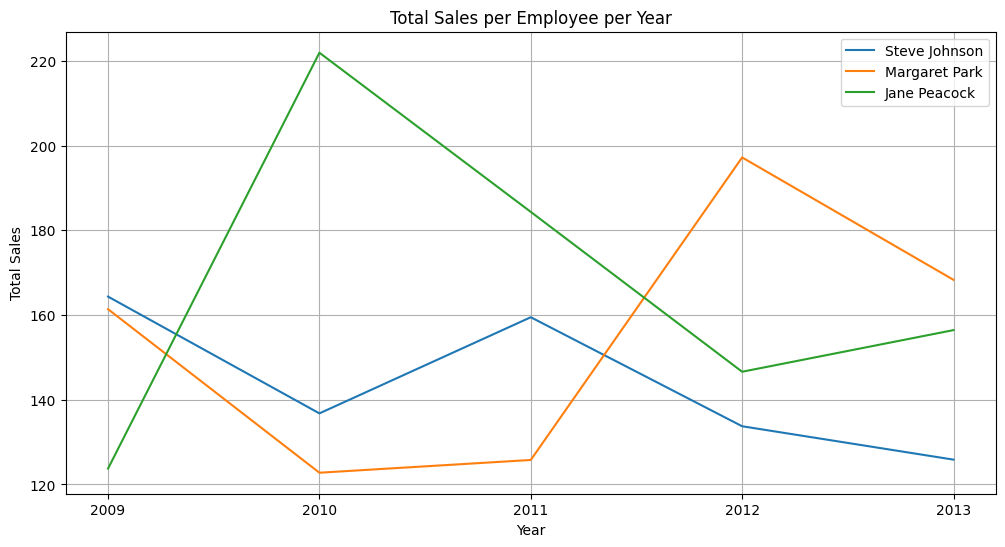

In [23]:
# Connect to the database
conn = db.connect('chinook.db')

# Query to get the total sales per employee per year
query = """
SELECT
    STRFTIME('%Y', i.InvoiceDate) AS Year,
    e.FirstName || ' ' || e.LastName AS EmployeeName,
    SUM(i.Total) AS TotalSales
FROM
    Employees e
JOIN
    Customers c ON e.EmployeeId = c.SupportRepId
JOIN
    Invoices i ON c.CustomerId = i.CustomerId
GROUP BY
    Year, EmployeeName
ORDER BY
    Year, TotalSales DESC;
"""

# Execute the query and read the result into a Pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Create the plot
plt.figure(figsize=(12, 6))
for employee in df['EmployeeName'].unique():
    employee_data = df[df['EmployeeName'] == employee]
    plt.plot(employee_data['Year'], employee_data['TotalSales'], label=employee)

plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales per Employee per Year')
plt.legend()
plt.grid(True)
plt.show()


- What was Jane doing in 2010; and why did her sales fall from that year?
- What did Margaret do from 2011 to 2012 to improve?

2. What Cities have the most employees? Calgary

In [24]:
# Counting employees in each city
# First lets select the city colmn and count the num of employees
# Then we will use a CASE statement to catehorize cities based on conditions of Employee count
# Group the results based on city colum
# Order by decending/ High to Low
%%script sqlite3 --column --header chinook.db

SELECT City, COUNT(*) AS EmployeeCount,
CASE
WHEN COUNT(*) > 5 THEN 'High Density'
WHEN COUNT(*) BETWEEN 2 AND 5 THEN 'Medium Density'
ELSE 'Low Density'
END AS CityDensity
FROM employees
GROUP BY City
ORDER BY EmployeeCount DESC;

City        EmployeeCount  CityDensity   
----------  -------------  --------------
Calgary     5              Medium Density
Lethbridge  2              Medium Density
Edmonton    1              Low Density   


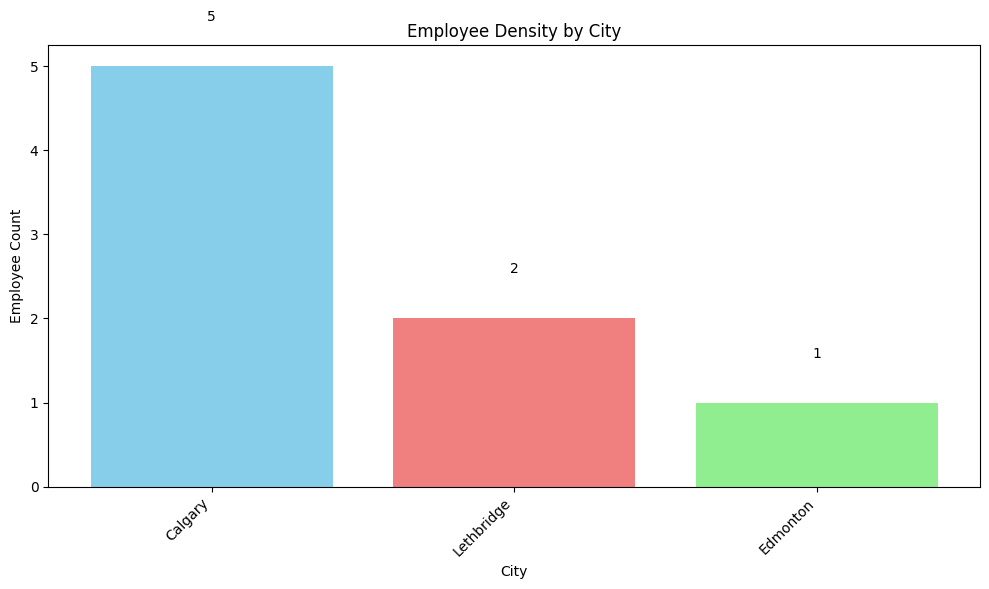

In [25]:
conn = db.connect('chinook.db')

query = """
SELECT City, COUNT(*) AS EmployeeCount,
CASE
WHEN COUNT(*) > 5 THEN 'High Density'
WHEN COUNT(*) BETWEEN 2 AND 5 THEN 'Medium Density'
ELSE 'Low Density'
END AS CityDensity
FROM employees
GROUP BY City
ORDER BY EmployeeCount DESC;
"""
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(df['City'], df['EmployeeCount'], color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("City")
plt.ylabel("Employee Count")
plt.title("Employee Density by City")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add labels to the bars (optional)
for i, count in enumerate(df['EmployeeCount']):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


## Conclusion

- SQL is a great way to interagate and query large data sets without having to see the entire data.
- Next goal is to find ways to make predictions from the data